# Classificação de imagens em Pyhon

Para isso, usaremos dois conjuntos de dados de treino e de teste, conforme especificaç˜ao abaixo. Esses conjuntos de dados podem os valores binários de dígitos desenhados à m˜ao e nossa tarefa será criar um modelo que reconheça estes dígitos.

Os arquivos de dados **train.csv** e **test.csv** contém imagens em escala de cinza, de dígitos desenhados à mão, de zero a nove. Cada imagem é de 28 pixels de altura e 28 pixels de largura, para um total de 784 pixels no total. Cada pixel tem um pixel de valor único associado a ele, indicando a claridade ou escuridão daquele pixel, com números mais elevados significam mais escura. Este valor de pixel é um número inteiro entre 0 e 255, inclusive. O conjunto de dados de treinamento, (train.csv), tem 785 colunas. A primeira coluna, chamado **marcador**, é o dígito que foi desenhado pelo usuário. O restante das colunas contêm os valores de pixel da imagem associada.

In [1]:
# Importando pacotes e definindo par^ametros
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Criando a fun¸c~ao para carregar o arquivo csv para um array numpy
def load_data(data_dir):
    train_data = open(data_dir + "train.csv").read()
    train_data = train_data.split("\n")[1:-1]
    train_data = [i.split(",") for i in train_data]

    # print(len(train_data))
    X_train = np.array([[int(i[j]) for j in range(1,len(i))] for i in train_data])
    y_train = np.array([int(i[0]) for i in train_data])

    # print(X_train.shape, y_train.shape)
    test_data = open(data_dir + "test.csv").read()
    test_data = test_data.split("\n")[1:-1]
    test_data = [i.split(",") for i in test_data]
    
    # print(len(test_data))
    X_test = np.array([[int(i[j]) for j in range(0,len(i))] for i in test_data])
    # print(X_test.shape)
    return X_train, y_train, X_test

In [3]:
# Criando uma classe
class simple_knn():
    "a simple kNN with L2 distance"
    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        dists = self.compute_distances(X)
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        
        for i in range(num_test):
            k_closest_y = []
            labels = self.y_train[np.argsort(dists[i,:])].flatten()
            # Encontrando os labels mais pr´oximos
            k_closest_y = labels[:k]
            c = Counter(k_closest_y)
            y_pred[i] = c.most_common(1)[0][0]
        
        return(y_pred)

    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dot_pro = np.dot(X, self.X_train.T)
        sum_square_test = np.square(X).sum(axis = 1)
        sum_square_train = np.square(self.X_train).sum(axis = 1)
        dists = np.sqrt(-2 * dot_pro + sum_square_train + np.matrix(sum_square_test).T)
        
        return(dists)

In [4]:
# Carregando os arquivos csv nas vari´aveis de treino e de teste
# Executa em alguns segundos
data_dir = "data/MNIST/"
X_train, y_train, X_test = load_data(data_dir)

In [5]:
# Imprimindo as vari´aveis
print(X_train.shape, y_train.shape, X_test.shape)

(42000, 784) (42000,) (28000, 784)


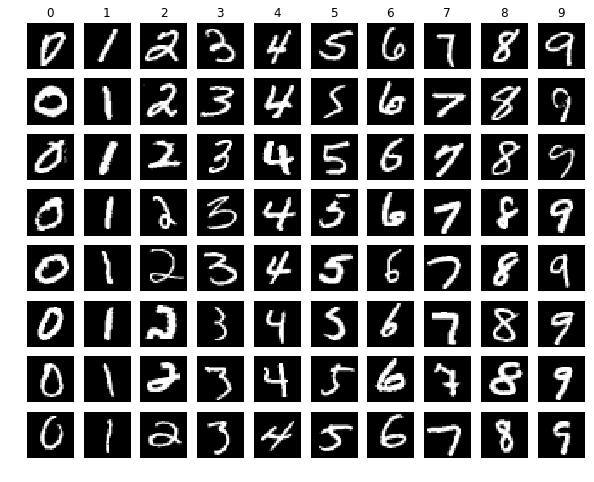

In [6]:
# Distribui as imagens dos d´ıgitos randomicamente atrav´es do dataset de treino
# Executa em alguns segundos
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
num_classes = len(classes)
samples = 8

for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in y_train])
    idxs = np.random.choice(idxs[0], samples, replace = False)

    for i , idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((28, 28)))
        plt.axis("off")

        if i == 0:
            plt.title(cls)
            
plt.show()

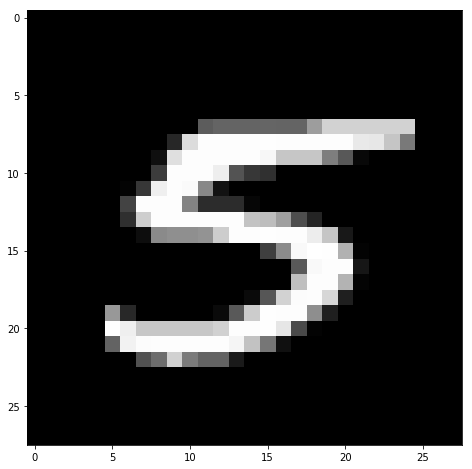

In [7]:
# Visualizando uma imagem de teste, reconhecida pelo modelo
plt.imshow(X_test[2311].reshape((28, 28)))

In [8]:
# Fazendo previs~oes para as imagens de teste, usando classificador kNN
batch_size = 2000
k = 1

classifier = simple_knn()
classifier.train(X_train, y_train)

In [9]:
# Processando o modelo preditivo na primeira metade do dataset de teste
# Executa em alguns minutos, dependendo da velocidade do computador
predictions = []

for i in range(int(len(X_test)/(2*batch_size))):
    print("Processando " + str(i+1) + "/" + str(int(len(X_test)/batch_size)) + "...")
    tic = time.time()
    predts = classifier.predict(X_test[i * batch_size:(i+1) * batch_size], k)
    toc = time.time()
    predictions = predictions + list(predts)
    print("Processamento concluído em " + str(toc-tic) + " segundos.")

print("Análise preditiva concluída!")

Processando 1/14...
Processamento concluído em 88.40789866447449 segundos.
Processando 2/14...
Processamento concluído em 88.77073168754578 segundos.
Processando 3/14...
Processamento concluído em 91.00346350669861 segundos.
Processando 4/14...
Processamento concluído em 91.7165138721466 segundos.
Processando 5/14...
Processamento concluído em 91.92266988754272 segundos.
Processando 6/14...
Processamento concluído em 90.74396085739136 segundos.
Processando 7/14...
Processamento concluído em 91.49296617507935 segundos.
Análise preditiva concluída!


In [10]:
# Processando o modelo preditivo na segunda metade do dataset de teste
# Executa em alguns minutos, dependendo da velocidade do computador
for i in range(int(len(X_test)/(2*batch_size)), int(len(X_test)/batch_size)):
    print("Processando " + str(i+1) + "/" + str(int(len(X_test)/batch_size)) + "...")
    tic = time.time()
    predts = classifier.predict(X_test[i * batch_size:(i+1) * batch_size], k)
    toc = time.time()
    predictions = predictions + list(predts)
    print("Processamento concluído em " + str(toc-tic) + " Secs.")
    
print("Análise preditiva concluída!")

Processando 8/14...
Processamento concluído em 91.20436429977417 Secs.
Processando 9/14...
Processamento concluído em 90.4969551563263 Secs.
Processando 10/14...
Processamento concluído em 90.59733128547668 Secs.
Processando 11/14...
Processamento concluído em 90.24235820770264 Secs.
Processando 12/14...
Processamento concluído em 90.38445949554443 Secs.
Processando 13/14...
Processamento concluído em 90.99682903289795 Secs.
Processando 14/14...
Processamento concluído em 91.08956813812256 Secs.
Análise preditiva concluída!


In [12]:
# Grava o resultado da predição em um arquivo csv
#out_file = open("data/MNIST/previsoes.csv", "w")
#out_file.write("ImageId,Label\n")
#for i in range(len(predictions)):
#    out_file.write(str(i+1) + "," + str(int(predictions[i])) + "\n")
#out_file.close()

print("ImageId,Label\n")

for i in range(len(predictions)):
    print(str(i+1) + "," + str(int(predictions[i])) + "\n")

ImageId,Label

1,2

2,0

3,9

4,0

5,3

6,7

7,0

8,3

9,0

10,3

11,5

12,7

13,4

14,0

15,4

16,3

17,3

18,1

19,9

20,0

21,9

22,1

23,1

24,5

25,7

26,4

27,2

28,7

29,9

30,7

31,7

32,5

33,4

34,2

35,6

36,2

37,5

38,5

39,1

40,6

41,7

42,7

43,4

44,9

45,8

46,7

47,8

48,2

49,6

50,7

51,6

52,8

53,8

54,3

55,8

56,2

57,1

58,2

59,2

60,0

61,4

62,1

63,7

64,0

65,0

66,0

67,1

68,9

69,0

70,1

71,6

72,5

73,8

74,8

75,2

76,8

77,8

78,9

79,2

80,3

81,5

82,4

83,1

84,0

85,9

86,2

87,4

88,3

89,6

90,7

91,2

92,0

93,6

94,6

95,1

96,4

97,3

98,9

99,7

100,4

101,0

102,9

103,2

104,0

105,7

106,3

107,0

108,5

109,0

110,8

111,0

112,0

113,4

114,7

115,1

116,7

117,1

118,1

119,3

120,3

121,3

122,7

123,2

124,8

125,6

126,3

127,8

128,7

129,8

130,4

131,3

132,5

133,6

134,0

135,0

136,0

137,3

138,1

139,5

140,6

141,4

142,3

143,4

144,5

145,5

146,8

147,7

148,7

149,2

150,8

151,4

152,3

153,5

154,6

155,5

156,3

1


1451,8

1452,8

1453,7

1454,0

1455,9

1456,0

1457,8

1458,7

1459,0

1460,8

1461,5

1462,3

1463,3

1464,6

1465,2

1466,5

1467,3

1468,1

1469,7

1470,3

1471,1

1472,0

1473,6

1474,5

1475,9

1476,3

1477,2

1478,9

1479,4

1480,8

1481,8

1482,7

1483,6

1484,4

1485,4

1486,0

1487,7

1488,3

1489,9

1490,6

1491,7

1492,3

1493,8

1494,9

1495,5

1496,0

1497,8

1498,6

1499,0

1500,3

1501,0

1502,1

1503,8

1504,3

1505,8

1506,6

1507,0

1508,1

1509,0

1510,0

1511,7

1512,3

1513,6

1514,9

1515,2

1516,3

1517,1

1518,7

1519,7

1520,9

1521,5

1522,9

1523,9

1524,1

1525,1

1526,5

1527,8

1528,3

1529,2

1530,5

1531,4

1532,1

1533,8

1534,9

1535,0

1536,7

1537,0

1538,9

1539,0

1540,0

1541,7

1542,1

1543,3

1544,5

1545,5

1546,8

1547,9

1548,7

1549,9

1550,4

1551,6

1552,0

1553,1

1554,9

1555,2

1556,7

1557,4

1558,8

1559,5

1560,0

1561,5

1562,9

1563,8

1564,7

1565,5

1566,0

1567,1

1568,9

1569,9

1570,6

1571,3

1572,0

1573,8

1574,7

1575,5



4430,3

4431,0

4432,8

4433,2

4434,9

4435,1

4436,6

4437,9

4438,1

4439,0

4440,1

4441,8

4442,7

4443,6

4444,5

4445,5

4446,4

4447,1

4448,7

4449,3

4450,9

4451,1

4452,1

4453,2

4454,3

4455,9

4456,0

4457,7

4458,2

4459,2

4460,4

4461,1

4462,7

4463,7

4464,7

4465,8

4466,3

4467,5

4468,1

4469,6

4470,2

4471,1

4472,0

4473,8

4474,7

4475,2

4476,5

4477,1

4478,1

4479,8

4480,6

4481,9

4482,6

4483,6

4484,9

4485,3

4486,1

4487,7

4488,4

4489,9

4490,8

4491,6

4492,7

4493,8

4494,0

4495,7

4496,6

4497,1

4498,6

4499,8

4500,1

4501,3

4502,9

4503,0

4504,7

4505,8

4506,3

4507,2

4508,7

4509,0

4510,8

4511,1

4512,4

4513,0

4514,8

4515,7

4516,0

4517,6

4518,5

4519,1

4520,7

4521,0

4522,1

4523,6

4524,6

4525,1

4526,4

4527,8

4528,6

4529,8

4530,9

4531,5

4532,1

4533,0

4534,2

4535,2

4536,0

4537,7

4538,8

4539,3

4540,5

4541,1

4542,8

4543,3

4544,9

4545,6

4546,9

4547,8

4548,4

4549,9

4550,1

4551,0

4552,3

4553,3

4554,5


6888,9

6889,2

6890,3

6891,7

6892,3

6893,7

6894,7

6895,7

6896,0

6897,4

6898,9

6899,5

6900,2

6901,3

6902,6

6903,6

6904,7

6905,9

6906,3

6907,3

6908,7

6909,1

6910,4

6911,9

6912,0

6913,9

6914,9

6915,8

6916,0

6917,0

6918,2

6919,9

6920,2

6921,3

6922,9

6923,2

6924,4

6925,9

6926,2

6927,1

6928,9

6929,7

6930,6

6931,9

6932,1

6933,9

6934,6

6935,4

6936,7

6937,7

6938,7

6939,2

6940,7

6941,6

6942,2

6943,9

6944,6

6945,6

6946,7

6947,3

6948,9

6949,8

6950,3

6951,0

6952,9

6953,2

6954,8

6955,0

6956,3

6957,1

6958,9

6959,5

6960,2

6961,9

6962,9

6963,4

6964,4

6965,1

6966,0

6967,9

6968,1

6969,9

6970,7

6971,4

6972,5

6973,4

6974,3

6975,8

6976,5

6977,7

6978,0

6979,1

6980,4

6981,1

6982,8

6983,1

6984,6

6985,6

6986,9

6987,4

6988,8

6989,8

6990,1

6991,2

6992,2

6993,7

6994,8

6995,0

6996,2

6997,0

6998,4

6999,1

7000,3

7001,8

7002,1

7003,7

7004,6

7005,5

7006,4

7007,5

7008,0

7009,2

7010,2

7011,1

7012,5



9568,2

9569,9

9570,0

9571,6

9572,3

9573,6

9574,6

9575,6

9576,5

9577,1

9578,9

9579,9

9580,3

9581,6

9582,3

9583,0

9584,0

9585,7

9586,2

9587,0

9588,3

9589,2

9590,5

9591,7

9592,9

9593,6

9594,4

9595,8

9596,4

9597,4

9598,1

9599,9

9600,8

9601,8

9602,9

9603,1

9604,5

9605,7

9606,1

9607,6

9608,7

9609,0

9610,2

9611,8

9612,7

9613,4

9614,5

9615,5

9616,2

9617,6

9618,1

9619,1

9620,4

9621,0

9622,9

9623,4

9624,3

9625,7

9626,9

9627,3

9628,0

9629,2

9630,9

9631,6

9632,3

9633,3

9634,3

9635,2

9636,3

9637,4

9638,6

9639,7

9640,9

9641,3

9642,6

9643,7

9644,8

9645,3

9646,9

9647,1

9648,2

9649,4

9650,5

9651,9

9652,9

9653,4

9654,1

9655,4

9656,7

9657,6

9658,8

9659,2

9660,8

9661,0

9662,6

9663,2

9664,9

9665,6

9666,7

9667,1

9668,2

9669,7

9670,8

9671,6

9672,0

9673,8

9674,5

9675,1

9676,7

9677,7

9678,3

9679,5

9680,3

9681,7

9682,4

9683,7

9684,0

9685,4

9686,1

9687,9

9688,1

9689,5

9690,2

9691,1

9692,6




12383,0

12384,9

12385,2

12386,4

12387,1

12388,5

12389,4

12390,7

12391,1

12392,4

12393,1

12394,7

12395,2

12396,1

12397,5

12398,2

12399,7

12400,1

12401,3

12402,2

12403,1

12404,1

12405,8

12406,4

12407,9

12408,5

12409,4

12410,0

12411,4

12412,6

12413,2

12414,0

12415,9

12416,6

12417,4

12418,4

12419,5

12420,3

12421,2

12422,5

12423,9

12424,1

12425,7

12426,5

12427,0

12428,0

12429,8

12430,3

12431,0

12432,0

12433,9

12434,3

12435,1

12436,3

12437,9

12438,5

12439,5

12440,3

12441,7

12442,2

12443,9

12444,0

12445,8

12446,2

12447,8

12448,0

12449,7

12450,1

12451,7

12452,6

12453,3

12454,0

12455,6

12456,4

12457,3

12458,7

12459,6

12460,7

12461,4

12462,2

12463,0

12464,9

12465,2

12466,2

12467,6

12468,1

12469,8

12470,6

12471,4

12472,5

12473,2

12474,3

12475,6

12476,9

12477,8

12478,5

12479,5

12480,2

12481,4

12482,2

12483,1

12484,5

12485,3

12486,8

12487,6

12488,9

12489,2

12490,6

12491,1

12492,4

12493,6




15109,3

15110,8

15111,2

15112,5

15113,0

15114,6

15115,1

15116,1

15117,9

15118,2

15119,7

15120,1

15121,5

15122,7

15123,3

15124,9

15125,9

15126,1

15127,3

15128,9

15129,7

15130,7

15131,2

15132,1

15133,8

15134,3

15135,7

15136,3

15137,9

15138,4

15139,2

15140,1

15141,4

15142,6

15143,7

15144,4

15145,6

15146,2

15147,6

15148,4

15149,1

15150,9

15151,7

15152,1

15153,6

15154,6

15155,3

15156,8

15157,4

15158,5

15159,3

15160,7

15161,3

15162,9

15163,8

15164,4

15165,6

15166,9

15167,0

15168,2

15169,9

15170,8

15171,1

15172,7

15173,2

15174,5

15175,3

15176,3

15177,7

15178,9

15179,3

15180,4

15181,5

15182,9

15183,9

15184,2

15185,8

15186,8

15187,6

15188,1

15189,1

15190,8

15191,3

15192,2

15193,9

15194,6

15195,8

15196,8

15197,5

15198,1

15199,8

15200,1

15201,8

15202,0

15203,6

15204,0

15205,3

15206,4

15207,3

15208,3

15209,6

15210,9

15211,3

15212,2

15213,0

15214,8

15215,3

15216,0

15217,1

15218,9

15219,6




17935,9

17936,7

17937,9

17938,9

17939,4

17940,3

17941,5

17942,5

17943,7

17944,0

17945,0

17946,7

17947,9

17948,7

17949,0

17950,4

17951,0

17952,5

17953,0

17954,0

17955,5

17956,7

17957,6

17958,3

17959,2

17960,7

17961,8

17962,2

17963,3

17964,7

17965,2

17966,8

17967,1

17968,4

17969,1

17970,4

17971,9

17972,0

17973,7

17974,6

17975,8

17976,2

17977,1

17978,9

17979,1

17980,7

17981,0

17982,5

17983,5

17984,3

17985,6

17986,2

17987,6

17988,5

17989,0

17990,6

17991,4

17992,0

17993,1

17994,6

17995,1

17996,2

17997,6

17998,4

17999,6

18000,4

18001,9

18002,2

18003,9

18004,5

18005,9

18006,8

18007,5

18008,6

18009,0

18010,0

18011,1

18012,4

18013,9

18014,1

18015,3

18016,4

18017,8

18018,6

18019,4

18020,5

18021,1

18022,9

18023,8

18024,9

18025,6

18026,4

18027,1

18028,8

18029,2

18030,3

18031,7

18032,2

18033,5

18034,3

18035,3

18036,1

18037,6

18038,3

18039,1

18040,4

18041,2

18042,1

18043,1

18044,6

18045,7



20473,1

20474,1

20475,8

20476,8

20477,5

20478,2

20479,9

20480,1

20481,3

20482,0

20483,0

20484,7

20485,5

20486,9

20487,0

20488,3

20489,2

20490,6

20491,7

20492,5

20493,3

20494,2

20495,1

20496,9

20497,4

20498,6

20499,5

20500,9

20501,1

20502,8

20503,8

20504,8

20505,1

20506,8

20507,8

20508,3

20509,4

20510,3

20511,5

20512,6

20513,2

20514,1

20515,8

20516,6

20517,4

20518,6

20519,3

20520,6

20521,8

20522,1

20523,5

20524,0

20525,5

20526,0

20527,0

20528,9

20529,8

20530,1

20531,9

20532,0

20533,8

20534,8

20535,4

20536,2

20537,5

20538,9

20539,3

20540,1

20541,4

20542,2

20543,3

20544,4

20545,5

20546,0

20547,0

20548,3

20549,0

20550,6

20551,6

20552,1

20553,9

20554,1

20555,4

20556,9

20557,8

20558,2

20559,0

20560,4

20561,1

20562,5

20563,6

20564,4

20565,9

20566,4

20567,1

20568,0

20569,4

20570,1

20571,7

20572,0

20573,7

20574,3

20575,6

20576,7

20577,9

20578,6

20579,2

20580,6

20581,8

20582,5

20583,0

2


23103,2

23104,3

23105,6

23106,1

23107,1

23108,9

23109,5

23110,3

23111,1

23112,3

23113,3

23114,6

23115,8

23116,3

23117,5

23118,0

23119,7

23120,1

23121,5

23122,8

23123,5

23124,6

23125,6

23126,1

23127,3

23128,2

23129,8

23130,1

23131,1

23132,9

23133,8

23134,5

23135,9

23136,5

23137,5

23138,1

23139,7

23140,1

23141,1

23142,6

23143,5

23144,7

23145,2

23146,3

23147,2

23148,5

23149,7

23150,3

23151,9

23152,2

23153,3

23154,5

23155,1

23156,6

23157,4

23158,7

23159,7

23160,0

23161,3

23162,6

23163,7

23164,1

23165,9

23166,6

23167,3

23168,7

23169,0

23170,6

23171,9

23172,1

23173,2

23174,1

23175,1

23176,2

23177,9

23178,8

23179,3

23180,2

23181,0

23182,2

23183,3

23184,7

23185,6

23186,9

23187,6

23188,6

23189,6

23190,4

23191,6

23192,1

23193,0

23194,2

23195,3

23196,0

23197,4

23198,7

23199,6

23200,8

23201,8

23202,7

23203,2

23204,6

23205,3

23206,2

23207,2

23208,4

23209,7

23210,0

23211,0

23212,1

23213,0



25978,5

25979,4

25980,4

25981,2

25982,0

25983,1

25984,7

25985,6

25986,6

25987,7

25988,0

25989,6

25990,4

25991,9

25992,8

25993,8

25994,9

25995,3

25996,3

25997,1

25998,0

25999,4

26000,4

26001,7

26002,0

26003,5

26004,7

26005,6

26006,7

26007,8

26008,1

26009,3

26010,4

26011,6

26012,7

26013,0

26014,4

26015,3

26016,2

26017,5

26018,3

26019,7

26020,3

26021,7

26022,1

26023,9

26024,1

26025,3

26026,4

26027,0

26028,1

26029,7

26030,4

26031,2

26032,4

26033,3

26034,5

26035,4

26036,0

26037,4

26038,2

26039,2

26040,6

26041,9

26042,3

26043,3

26044,9

26045,9

26046,8

26047,1

26048,5

26049,1

26050,7

26051,0

26052,3

26053,1

26054,9

26055,2

26056,8

26057,4

26058,8

26059,2

26060,1

26061,7

26062,0

26063,0

26064,1

26065,8

26066,7

26067,4

26068,9

26069,9

26070,7

26071,0

26072,5

26073,1

26074,5

26075,8

26076,6

26077,8

26078,5

26079,6

26080,5

26081,6

26082,1

26083,1

26084,4

26085,6

26086,4

26087,3

26088,6

2